In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_csv("D:\SUBHAJIT\PG_ML_INTELLIPAAT\Practice\Machine learning\SVM\creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
data_fraud=data[data["Class"]==1]
data_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


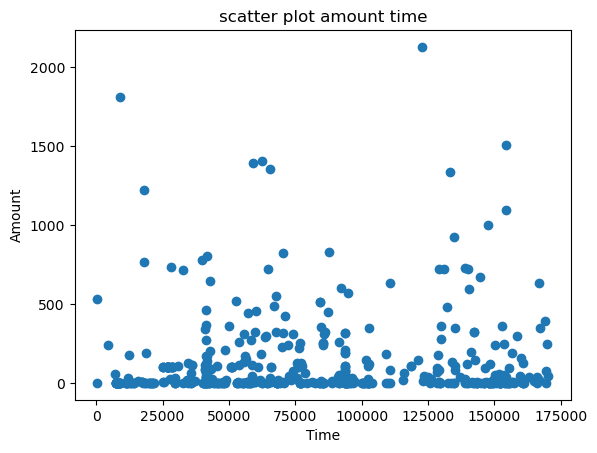

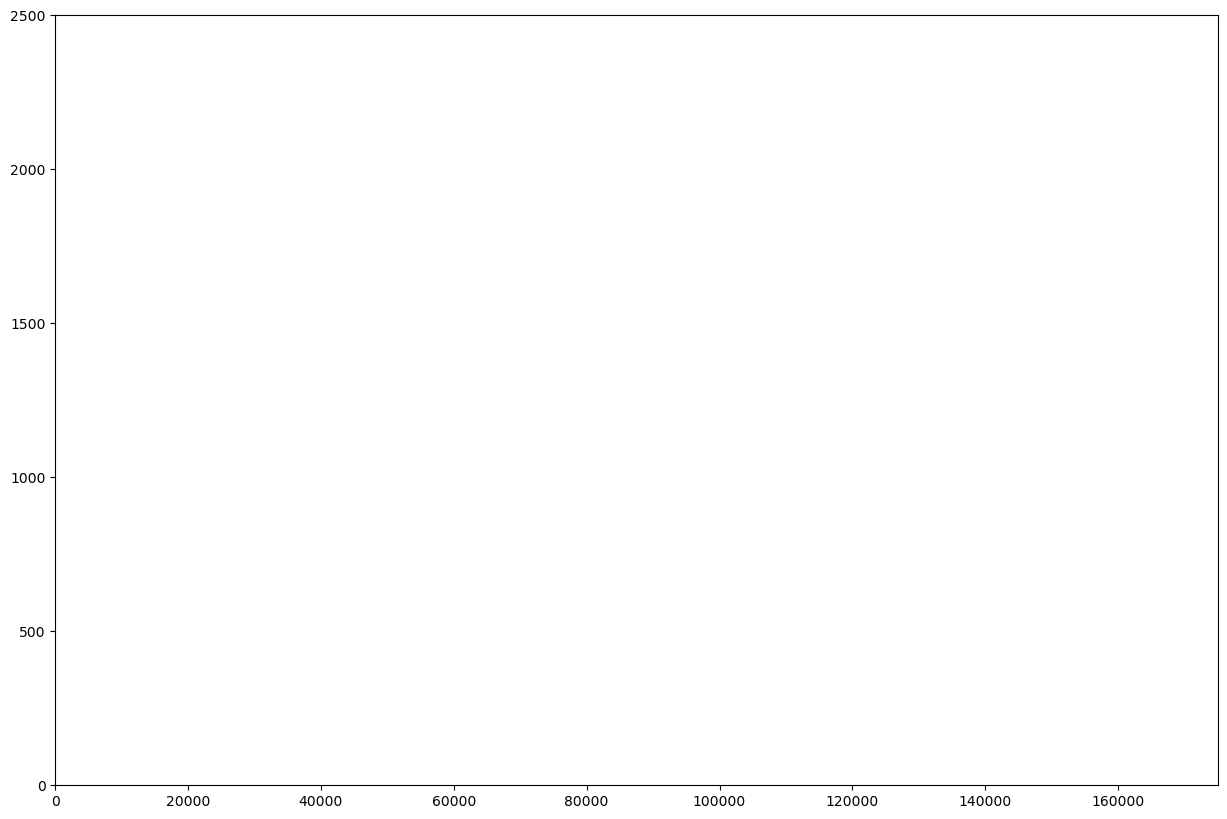

In [13]:
plt.scatter(data_fraud["Time"],data_fraud["Amount"])
plt.title("scatter plot amount time")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.figure(figsize=(15,10))
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [23]:
nb_big_fraud=data_fraud[data_fraud["Amount"]>1000].shape[0]
nb_big_fraud

9

In [27]:
number_fraud=len(data[data["Class"]==1])
number_no_fraud=len(data[data["Class"]==0])

number_no_fraud

284315

In [29]:
number_fraud

492

we can see we have fraud data 492 and not fraud 284315 so it is highly imbalanced data we need to do undersampling or oversampling

In [32]:
df_corr=data.corr()

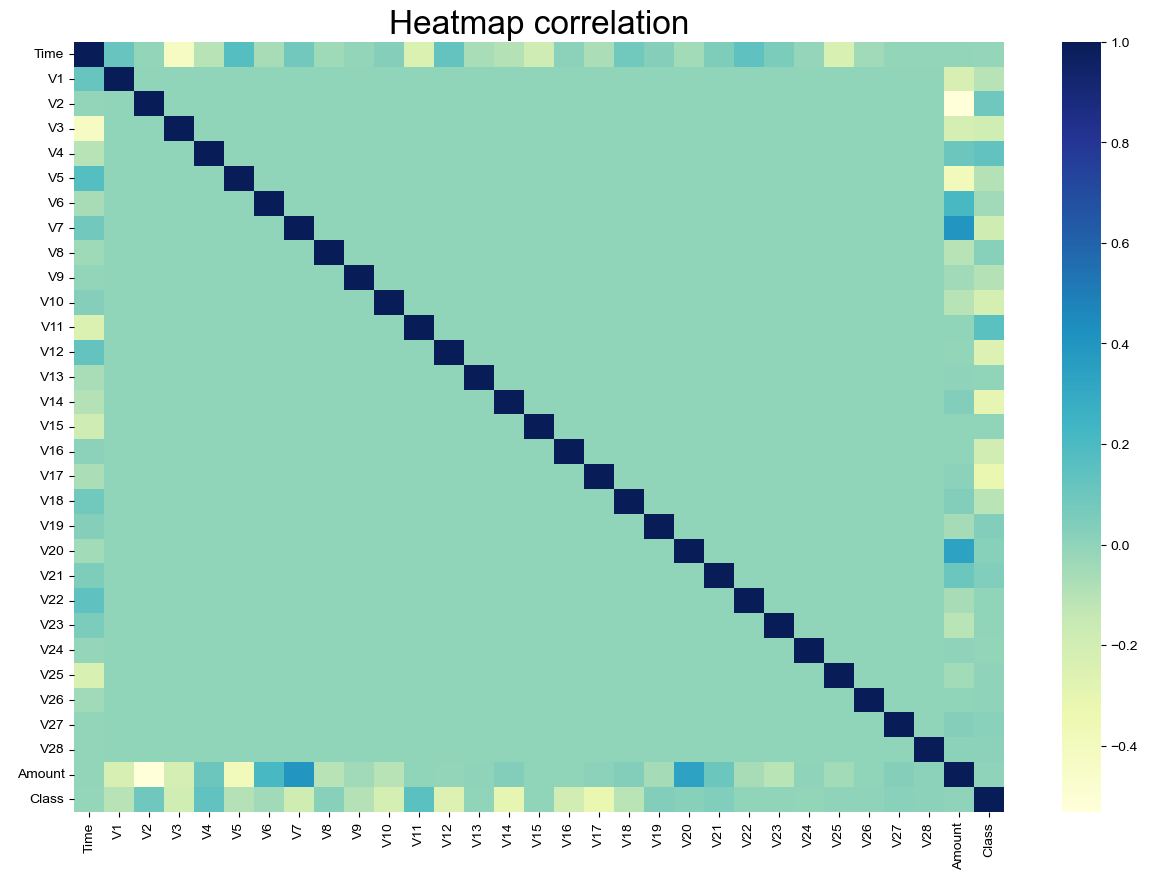

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,cmap="YlGnBu")
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

we can see many features are not corelated each other which tells PCA has been implemented previously so we cannot do dimension reduction

In [41]:
data_train_all=data[:15000]
data_train_1=data_train_all[data_train_all["Class"]==1]
data_train_0=data_train_all[data_train_all["Class"]==0]
print('In this dataset, we have ' + str(len(data_train_1)) +" frauds so we need to take a similar number of non-fraud")
data_train_1

In this dataset, we have 61 frauds so we need to take a similar number of non-fraud


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14104,25095.0,1.192396,1.338974,-0.678876,3.123672,0.643245,-1.184323,0.397586,-0.253499,0.411135,...,-0.377503,-0.889597,-0.074208,0.035446,0.550578,-0.027171,-0.024921,0.073605,3.12,1
14170,25198.0,-15.903635,10.393917,-19.133602,6.185969,-12.538021,-4.027030,-13.897827,10.662252,-2.844954,...,1.577548,-1.280137,-0.601295,0.040404,0.995502,-0.273743,1.688136,0.527831,99.99,1
14197,25231.0,-16.598665,10.541751,-19.818982,6.017295,-13.025901,-4.128779,-14.118865,11.161144,-4.099551,...,1.725853,-1.151606,-0.680052,0.108176,1.066878,-0.233720,1.707521,0.511423,99.99,1
14211,25254.0,-17.275191,10.819665,-20.363886,6.046612,-13.465033,-4.166647,-14.409448,11.580797,-4.073856,...,1.729804,-1.208096,-0.726839,0.112540,1.119193,-0.233189,1.684063,0.503740,99.99,1


In [43]:
data_train_0

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,26319.0,1.139049,0.078237,0.480345,0.471539,-0.271098,-0.195209,-0.108635,0.087148,-0.189344,...,-0.169569,-0.544291,0.139743,0.007989,0.101150,0.105698,-0.021173,0.008139,19.99,0
14996,26322.0,1.297527,0.290501,-0.157129,0.300362,0.275047,-0.075184,-0.028201,0.006493,-0.178580,...,-0.310852,-0.915030,-0.029196,-0.872330,0.349254,0.148786,-0.026891,0.009091,0.89,0
14997,26322.0,1.245674,0.166975,0.488306,0.635322,-0.562777,-1.011073,0.014953,-0.160211,0.170362,...,-0.262581,-0.816264,0.140304,0.357827,0.186423,0.096544,-0.035866,0.018495,8.99,0
14998,26323.0,1.297276,-0.694728,0.965737,-0.673381,-1.258920,-0.230760,-1.015842,0.016820,-0.544937,...,0.430698,1.238301,-0.099574,0.156464,0.379390,-0.025062,0.056696,0.027675,29.95,0


In [55]:
data_sample=data_train_0.sample(300)
data_train_new=data_train_1._append(data_sample,ignore_index=True)
data_train_new=data_train_new.sample(frac=1)
data_train_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
242,24262.0,-0.237948,-0.218321,1.698616,-2.243205,-0.700941,-1.014947,0.007721,-0.448378,-0.816369,...,-0.329285,-0.105484,-0.025076,0.295801,-0.332047,-0.479256,0.194080,-0.015208,25.00,0
191,3264.0,-0.756523,0.237517,2.169894,-0.435098,-0.084049,0.199395,0.640758,0.015079,0.592664,...,0.022519,0.164549,-0.379824,-0.454841,0.554014,0.453667,-0.178563,-0.170493,69.99,0
47,18690.0,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,...,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1.00,1
179,2061.0,0.328575,-1.470151,0.745395,1.445979,-1.262146,0.596793,-0.342288,0.344715,0.738119,...,0.420299,0.417099,-0.397711,0.007172,0.206632,-0.281385,-0.003320,0.086385,396.28,0
151,9434.0,-1.530356,1.290516,0.738410,-0.457842,-0.107840,1.105888,-0.700017,1.355437,1.712226,...,-0.221934,-0.251064,-0.242827,-1.388564,0.176284,0.445314,0.155731,0.075487,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,3082.0,-1.417326,1.579581,0.274730,-0.989929,0.007662,-0.005651,-0.006878,0.966857,-0.497556,...,-0.151709,-0.429351,-0.133935,-0.793781,0.047418,0.353934,0.161082,0.094488,4.00,0
163,1655.0,1.159945,-0.092471,0.126678,0.031102,-0.443156,-0.913536,0.207052,-0.220173,-0.095453,...,0.014155,0.094128,-0.124669,0.657772,0.498298,1.084540,-0.102559,-0.006223,50.11,0
141,15124.0,-2.149789,0.972363,-0.233447,-0.887317,1.246592,3.785172,-0.606391,1.730288,0.819285,...,-0.256135,-0.725039,-0.034730,0.954412,0.384467,0.241489,0.066946,-0.005989,119.99,0
256,24000.0,1.207892,-0.098400,0.472470,0.041344,-0.659200,-0.890118,-0.245740,-0.160615,1.667604,...,-0.100598,-0.080898,0.048033,0.421557,0.112275,1.423444,-0.135263,-0.010233,24.99,0


In [57]:
x_train=data_train_new.drop(["Time","Class"],axis=1)
y_train=data_train_new["Class"]
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [59]:
df_test_all = data[150000:]

x_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
x_test_all = np.asarray(x_test_all)
y_test_all = np.asarray(y_test_all)

In [61]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

In [65]:
classifier = svm.SVC(kernel='linear')

In [67]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [69]:
prediction_SVM_all = classifier.predict(x_test_all)

In [73]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test_all, prediction_SVM_all)

0.9871149124303634

In [ ]:
classifier.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier.predict(X_test_all_rank)